In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Replace 'your_shapefile_path' with the path to your shapefile
gdf = gpd.read_file('../../../data/raw/cb_2018_us_cbsa_500k.shp')
gdf_CT = gpd.read_file('../../../data/raw/cb_2018_us_state_500k.shp')
gdf_CT_census = gpd.read_file('../../../data/raw/cb_2018_09_bg_500k.shp')
gdf_counties = gpd.read_file('../../../data/raw/cb_2018_us_county_500k.shp')
gdf_towns = gpd.read_file('../../../data/raw/Town_Polygon.shp')


# Replace 'population_csv_path' with the path to your population data CSV
population = pd.read_excel('../../../data/raw/pop_towns2022 (1).xlsx')
population = population.iloc[16:185]
population  = population.reset_index(drop=True)
population
population = population.iloc[:, :-2]


new_column_index = ['TOWN', 'Population']

# Assign the new column index directly to the columns attribute
population.columns = new_column_index
population

,TOWN,Population
0,ANDOVER,3150
1,ANSONIA,18923
2,ASHFORD,4222
3,AVON,18871
4,BARKHAMSTED,3667
...,...,...
164,WINDSOR LOCKS,12537
165,WOLCOTT,16190
166,WOODBRIDGE,9051
167,WOODBURY,9802


In [9]:
inland_data = gdf_towns[gdf_towns['COASTP_COD'] == 1]
sorted_df = inland_data.sort_values(by='ACREAGE', ascending=False)

# Keep only the first occurrence of each town name (largest ACREAGE)
town_final = sorted_df.drop_duplicates(subset='TOWN', keep='first')
town_final  = town_final.sort_values(by='TOWN')
town_final.reset_index(drop=True, inplace=True)
town_final['TOWN'] = town_final['TOWN'].str.upper()
merged_data = pd.merge(town_final, population, how="left", left_on="TOWN", right_on="TOWN")
merged_data 

,OBJECTID,TBPOLY_COD,TOWN_POLY,AV_LEGEND,IMS_LEGEND,COASTP_COD,COAST_POLY,STATE_COD,FIPS_COD,TOWN_NO,TOWN,CNTY_COD,COUNTY,ACREAGE,AREA_SQMI,SHAPE_Leng,SHAPE_Area,geometry,Population
0,58,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09013,1,ANDOVER,13,Tolland,10056.900391,15.713900,0.277579,0.004405,"POLYGON ((-72.41053 41.76566, -72.40643 41.765...",3150
1,150,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09009,2,ANSONIA,9,New Haven,4000.110107,6.250160,0.173936,0.001742,"POLYGON ((-73.09538 41.35995, -73.09521 41.360...",18923
2,19,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09015,3,ASHFORD,15,Windham,25268.400391,39.481899,0.439113,0.011093,"POLYGON ((-72.21693 41.95823, -72.21310 41.958...",4222
3,44,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09003,4,AVON,3,Hartford,14992.299805,23.425501,0.360636,0.006572,"POLYGON ((-72.79856 41.82497, -72.79870 41.824...",18871
4,16,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,5,BARKHAMSTED,5,Litchfield,24775.300781,38.711498,0.447544,0.010883,"POLYGON ((-73.02948 41.96662, -73.02524 41.966...",3667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,22,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09003,165,WINDSOR LOCKS,3,Hartford,5976.390137,9.338110,0.227728,0.002625,"POLYGON ((-72.68763 41.94821, -72.67428 41.947...",12537
165,89,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09009,166,WOLCOTT,9,New Haven,13539.400391,21.155300,0.298622,0.005918,"POLYGON ((-72.93826 41.64412, -72.93800 41.640...",16190
166,138,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09009,167,WOODBRIDGE,9,New Haven,12283.900391,19.193600,0.328308,0.005349,"POLYGON ((-73.04760 41.39592, -73.04758 41.395...",9051
167,94,100.0,Connecticut Town,Connecticut Town,Town,1,Inland Polygons,CT,09005,168,WOODBURY,5,Litchfield,23514.800781,36.741901,0.421755,0.010272,"POLYGON ((-73.25351 41.60456, -73.24956 41.604...",9802


In [42]:
town_final
COLCHESTER = town_final.loc[town_final['TOWN'] == 'COLCHESTER']
LYME = town_final.loc[town_final['TOWN'] == 'LYME']
OLDLYME = town_final.loc[town_final['TOWN'] == 'OLD LYME']
BRIDGEWATER = town_final.loc[town_final['TOWN'] == 'BRIDGEWATER']
NEWMILFORD = town_final.loc[town_final['TOWN'] == 'NEW MILFORD']

In [43]:
CT_result = gdf_CT[gdf_CT['STUSPS'] == 'CT']
result = gdf[gdf['NAME'].str.contains('CT')]
result

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
271,278,25540,310M400US25540,25540,"Hartford-West Hartford-East Hartford, CT",M1,3922845118,238772610,"POLYGON ((-73.02054 42.00009, -73.00876 42.038..."
315,148,49340,310M400US49340,49340,"Worcester, MA-CT",M1,5241042553,198926981,"POLYGON ((-72.31363 42.39640, -72.31509 42.398..."
342,278,35980,310M400US35980,35980,"Norwich-New London, CT",M1,1722716728,276657755,"POLYGON ((-72.46673 41.58390, -72.42886 41.588..."
781,408,35300,310M400US35300,35300,"New Haven-Milford, CT",M1,1565688367,667081242,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ..."
939,408,14860,310M400US14860,14860,"Bridgeport-Stamford-Norwalk, CT",M1,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ..."
943,408,45860,310M400US45860,45860,"Torrington, CT",M2,2384116952,62334525,"POLYGON ((-73.51795 41.67086, -73.51678 41.687..."


In [44]:
CT_result = gdf_CT[gdf_CT['STUSPS'] == 'CT']
result = gdf[gdf['NAME'].str.contains('CT')]
result

#extract a single row out as the dataframe
HEM = result.iloc[0:1]
NHM = result.iloc[3:4]
BSN = result.iloc[4:5]

# Load population data for each MSA
NHM_population = 864751  # Replace with actual population data
HEM_population = 1213324  # Replace with actual population data
BSN_population = 956446   # Replace with actual population data

# Merge population data with the GeoDataFrames
NHM['population'] = NHM_population
HEM['population'] = HEM_population
BSN['population'] = BSN_population

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [45]:
#set the county name and heat map for the counties
STATEFP_connecticut = '09'
gdf_connecticut_counties = gdf_counties[gdf_counties['STATEFP'] == STATEFP_connecticut]
rows_to_drop = [661, 1238,1991]
gdf_connecticut_counties.drop(index=rows_to_drop, inplace=True)
target_counties = gdf_connecticut_counties
target_counties['POPULATION'] = [898636,956446,164568,150120,898636]
target_counties

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_2060\168835013.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_connecticut_counties.drop(index=rows_to_drop, inplace=True)
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,POPULATION
56,09,009,00212798,0500000US09009,09009,New Haven,06,1565688367,667081242,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...",898636
659,09,001,00212794,0500000US09001,09001,Fairfield,06,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...",956446
660,09,007,00212797,0500000US09007,09007,Middlesex,06,956493754,180679140,"POLYGON ((-72.75294 41.59250, -72.74284 41.594...",164568
1239,09,013,00212668,0500000US09013,09013,Tolland,06,1062807467,17549693,"POLYGON ((-72.51733 41.86990, -72.51692 41.873...",150120
2003,09,003,00212338,0500000US09003,09003,Hartford,06,1903543897,40543777,"POLYGON ((-73.02054 42.00009, -73.00876 42.038...",898636


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_2060\1784132395.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):


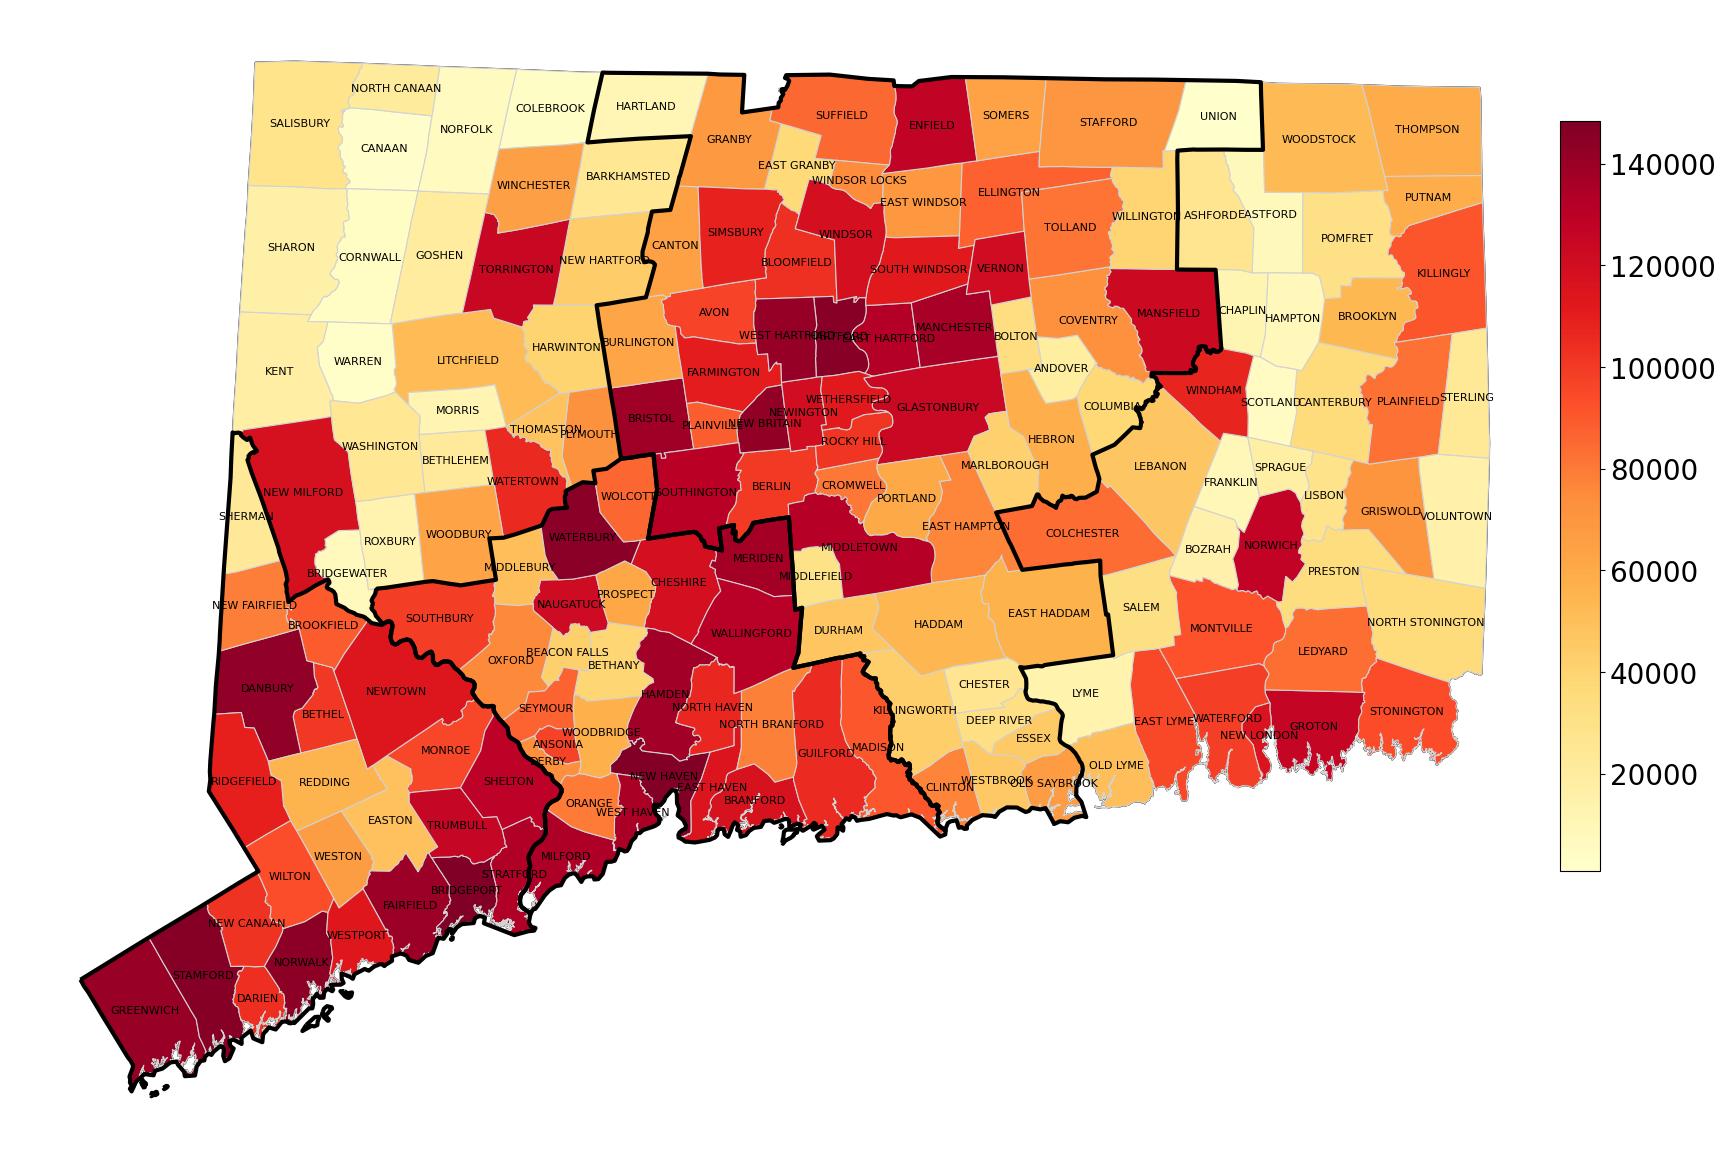

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the heatmap with adjusted boundary color
merged_data.plot(column='Population', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap

# Annotate with town labels
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')
    
# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
NHM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#NHM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with a color matching the heatmap
HEM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#HEM.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with a color matching the heatmap
BSN.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap
#BSN.plot(ax=ax, facecolor='darkorange', alpha=0.5)

# Add colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=merged_data['Population'].min(), vmax=merged_data['Population'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)

colorbar.ax.tick_params(labelsize=20)

#plt.show()
plt.savefig('../../../figures/Report-images/heatmap-CT-population.png',dpi=600, bbox_inches='tight')


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_2060\3764455477.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):


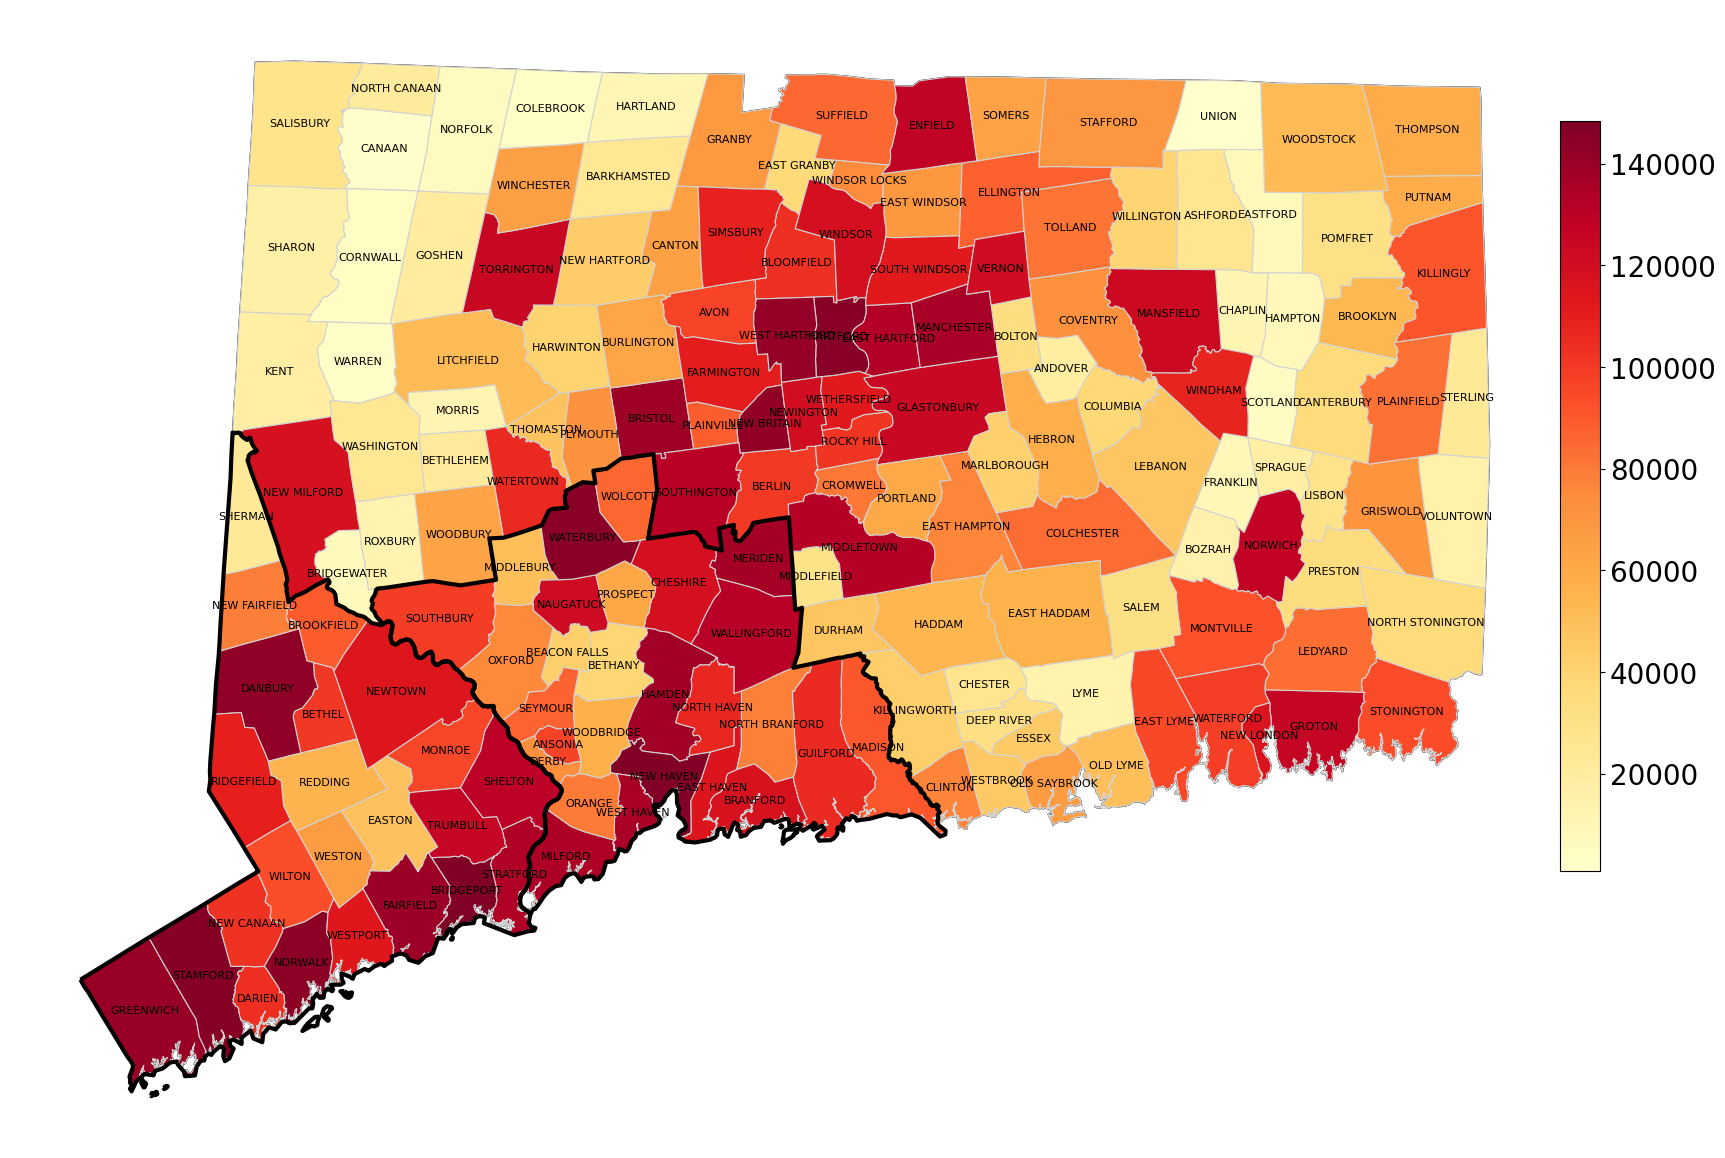

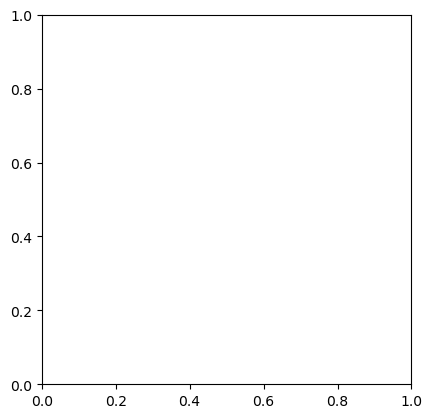

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Plot the heatmap with town boundaries
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_axis_off()
town_final.plot(ax=ax, color='white', edgecolor='black')  # Plot town boundaries

# Plot the heatmap with adjusted boundary color
merged_data.plot(column='Population', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='lightgray')  # Plot heatmap

# Annotate with town labels
for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['TOWN']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Plot the New Haven-Milford MSA and fill it with a color matching the heatmap
NHM.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap

# Plot the Bridgeport-Stamford-Norwalk MSA and fill it with a color matching the heatmap
BSN.boundary.plot(ax=ax, linewidth=3, color='black')  # Choose a color from the YlOrRd colormap

# Add the Hartford-East Hartford-Middletown MSA boundary with two additional towns
#additional_towns = ['COLCHESTER', 'LYME']  # Replace with the names of the two towns

# Select the two towns (replace with the actual names or other criteria)
town_names_to_add = ['COLCHESTER', 'LYME']
selected_towns = town_final[town_final['TOWN'].isin(town_names_to_add)]

# Combine the geometries of the selected towns
combined_towns_geometry = selected_towns.unary_union

# Get the boundary of the MSA
msa_boundary = HEM.unary_union.boundary

# Combine the MSA boundary with the union of the two towns
updated_msa_geometry = msa_boundary.union(combined_towns_geometry)

# Create a new GeoDataFrame with the updated MSA geometry
updated_msa_gdf = gpd.GeoDataFrame(geometry=[updated_msa_geometry])

# Plot the result
ax = updated_msa_gdf.boundary.plot()



# Add colorbar
cax = fig.add_axes([0.9, 0.3, 0.02, 0.5])
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=merged_data['Population'].min(), vmax=merged_data['Population'].max()))
sm._A = []
colorbar = fig.colorbar(sm, cax=cax)

colorbar.ax.tick_params(labelsize=20)

#plt.show()
plt.savefig('../../../figures/Report-images/heatmap-CT-population.png', dpi=600, bbox_inches='tight')


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_8108\3512940978.py:29: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(inland_data.geometry.centroid.x, inland_data.geometry.centroid.y, inland_data['TOWN']):


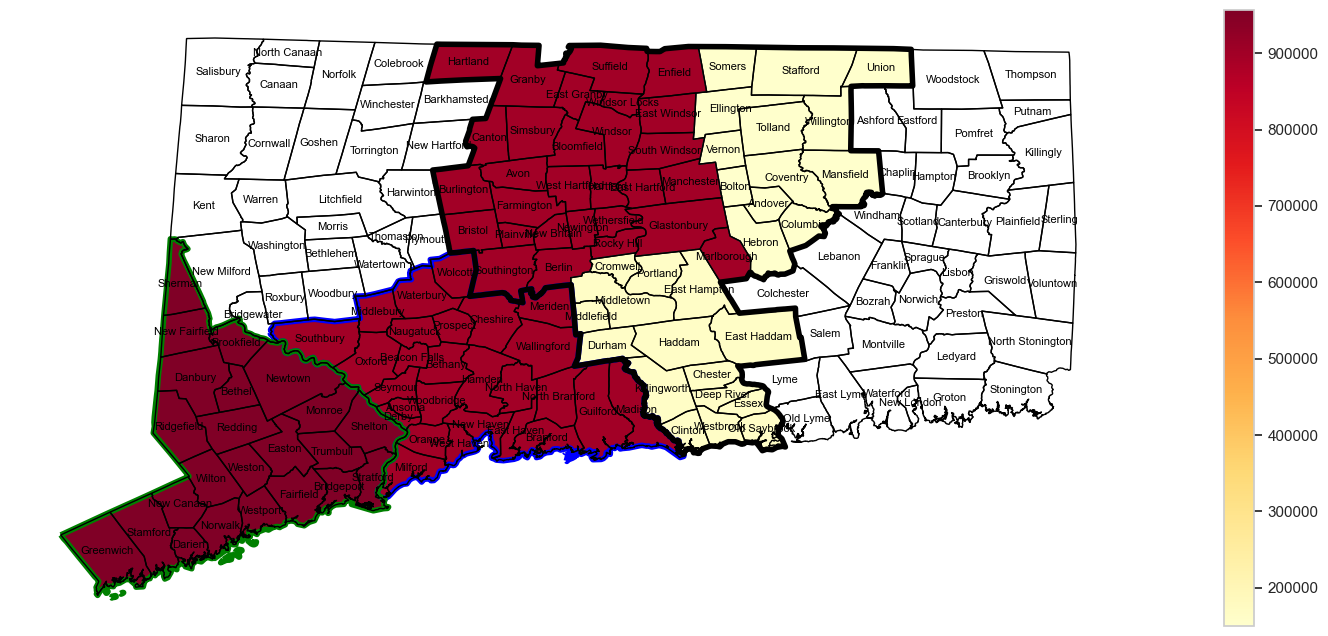

In [8]:
# Plotting settings
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(25, 8))
ax.set_axis_off()



# Replace 'column_with_population_data' with the column containing population information
target_counties.plot(column='POPULATION', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True,ax=ax)

# Plot the New Haven-Milford MSA and fill it with red
NHM.boundary.plot(ax=ax, linewidth=4, color='blue')
#NHM.plot(ax=ax, facecolor='red', alpha=0.5)

# Plot the Hartford-East Hartford-Middletown MSA, fill it with blue
HEM.boundary.plot(ax=ax, linewidth=4, color='black')
#HEM.plot(ax=ax, facecolor='blue', alpha=0.5)

# Plot the Bridgeport-Stamford-Norwalk MSA, fill it with green
BSN.boundary.plot(ax=ax, linewidth=4, color='green')
#BSN.plot(ax=ax, facecolor='green', alpha=0.5)

town_final.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot town labels
unique_town_names = set()
texts = []

for x, y, label in zip(inland_data.geometry.centroid.x, inland_data.geometry.centroid.y, inland_data['TOWN']):
    if label not in unique_town_names:
        texts.append(plt.text(x, y, label, fontsize=8, ha='center', va='center', color='black'))
        unique_town_names.add(label)

ax.set_aspect('equal')
#ax.set_title('Population-Based Heat Map of Connecticut and MSAs')


plt.savefig('../../../figures/heatmap-CT-geology.png', bbox_inches='tight')

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_8108\2382716912.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_towns.geometry.centroid.x, gdf_towns.geometry.centroid.y, gdf_towns['TOWN']):


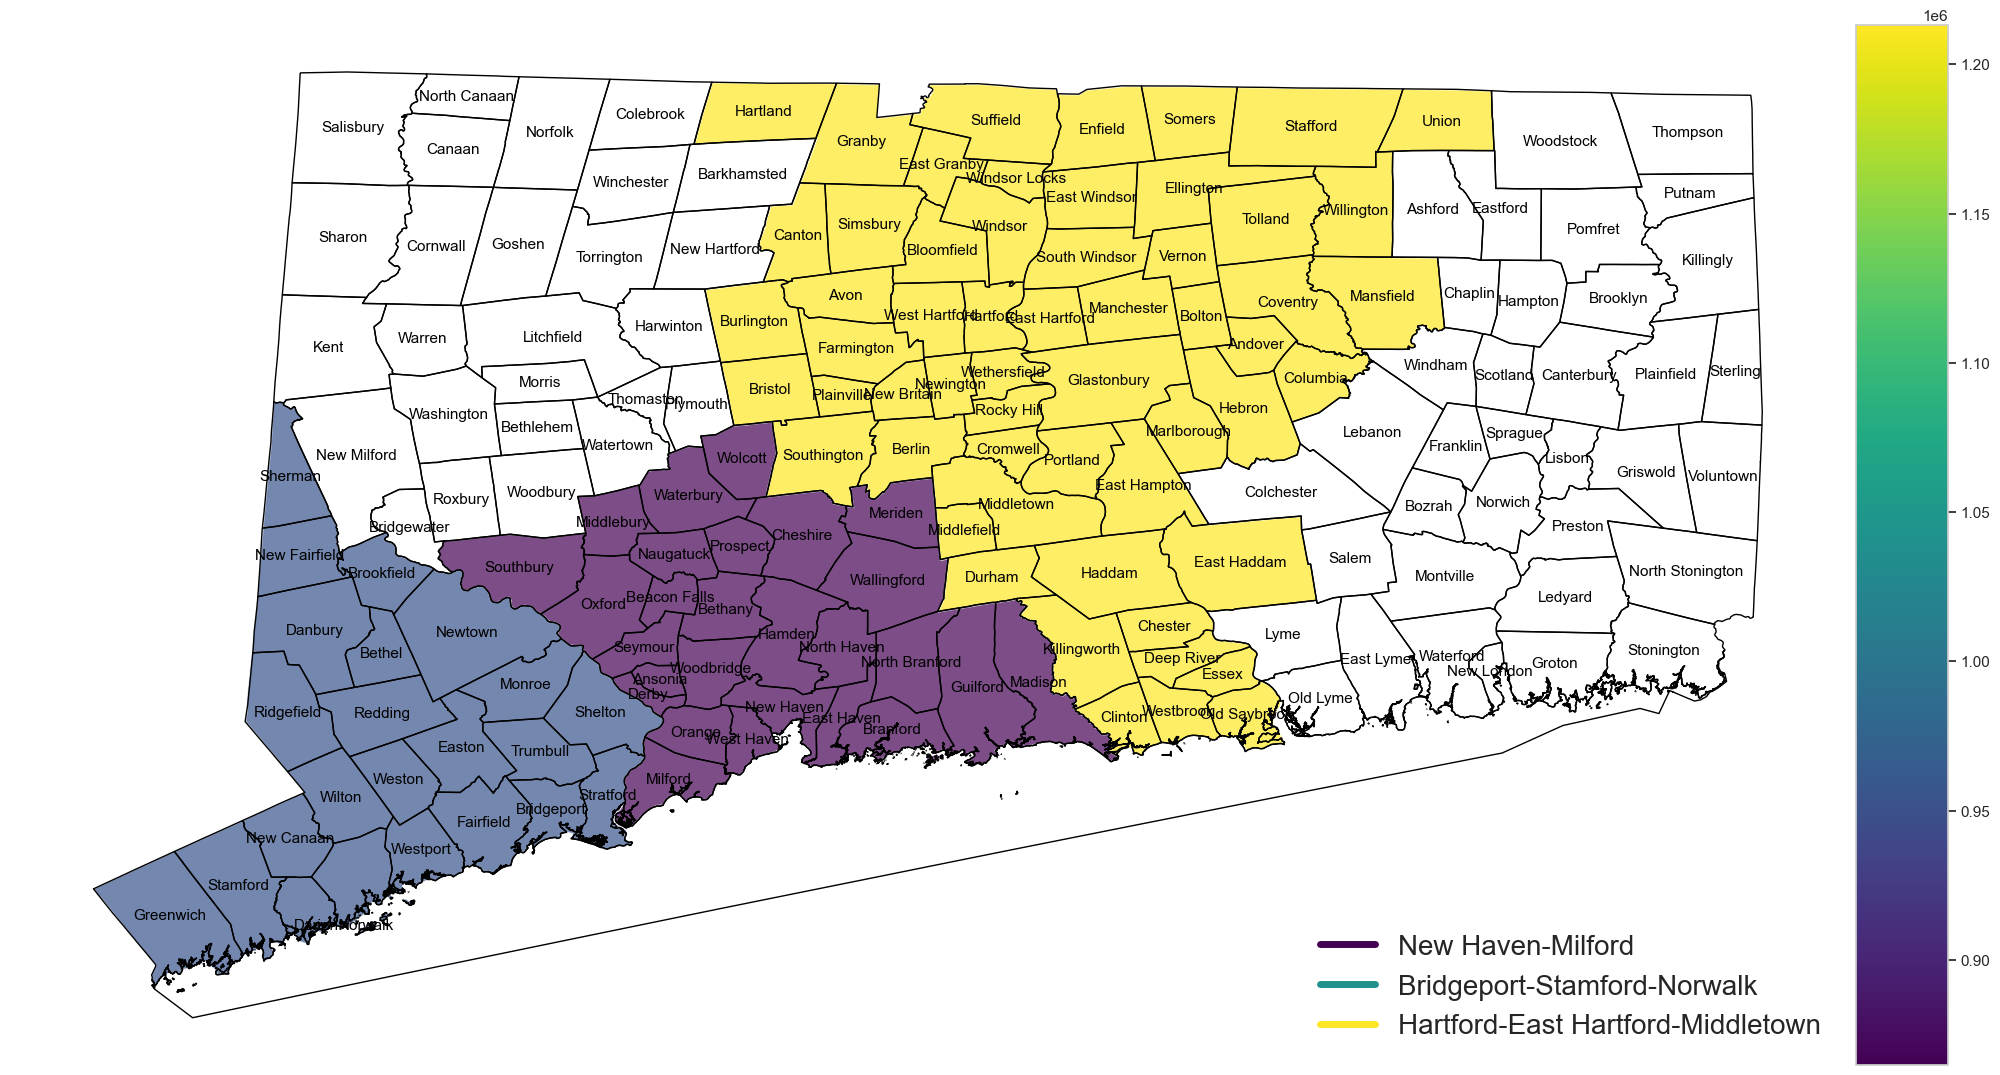

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

# Plotting settings
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(25, 15))
ax.set_axis_off()


gdf_towns.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot town labels
unique_town_names = set()
texts = []

for x, y, label in zip(gdf_towns.geometry.centroid.x, gdf_towns.geometry.centroid.y, gdf_towns['TOWN']):
    if label not in unique_town_names:
        texts.append(plt.text(x, y, label, fontsize=11, ha='center', va='center', color='black'))
        unique_town_names.add(label)
# Replace 'column_with_population_data' with the column containing population information
#target_counties.plot(column='POPULATION', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True,ax=ax)

# Plot the New Haven-Milford MSA with population-based colormap
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

vmin = min(NHM_population, HEM_population, BSN_population)
vmax = max(NHM_population, HEM_population, BSN_population)

# Plot the New Haven-Milford MSA with a population-based colormap and adjusted range
NHM.plot(ax=ax, column='population', cmap='viridis', alpha=0.7, legend=True, cax=cax, vmin=vmin, vmax=vmax)

# Plot the Hartford-East Hartford-Middletown MSA with a population-based colormap and adjusted range
HEM.plot(ax=ax, column='population', cmap='viridis', alpha=0.7, legend=True, cax=cax, vmin=vmin, vmax=vmax)

# Plot the Bridgeport-Stamford-Norwalk MSA with a population-based colormap and adjusted range
BSN.plot(ax=ax, column='population', cmap='viridis', alpha=0.7, legend=True, cax=cax, vmin=vmin, vmax=vmax)

ax.set_aspect('equal')

# Create a custom colormap for the legend
legend_cmap = ListedColormap(['#440154', '#21918C', '#FDE725'])  # Change these colors to match your heatmap

# Create custom legend handles with matching colors for the legend
legend_handles = [
    Line2D([0], [0], color=legend_cmap(0.2), lw=5, label='New Haven-Milford'),
    Line2D([0], [0], color=legend_cmap(0.5), lw=5, label='Bridgeport-Stamford-Norwalk'),
    Line2D([0], [0], color=legend_cmap(0.8), lw=5, label='Hartford-East Hartford-Middletown'),
]

# Add a custom legend to the map with transparent background
legend = ax.legend(handles=legend_handles, fontsize=20, loc='lower right', frameon=False)
#legend.set_title('MSAs')


ax.set_aspect('equal')
#ax.set_title('Population-Based Heat Map of Connecticut and MSAs')


plt.savefig('../../../figures/heatmap-CT-geology.png', bbox_inches='tight')